In [1]:
import tensorflow as  tf #Required to fit Neural Networks
import os #Required to address wd
import pandas as pd #Required for data manipulation
import numpy as np #Required for mathematical operations
import re #Required for reshaping the tweets without punctuation signs
import string#Required for reshaping the tweets without punctuation signs
from tensorflow.keras.layers import TextVectorization #Required for text vectorisation
import sklearn as sk #Required for accuracy metrics

$$
\large\textbf{Twitter/X sentiment analysis}
$$


$$
\textbf{Problem definition:}
$$


$
\small\text{Companies are constantly launching and testing new products, usually teasing them on Twitter/X. }
$
$
\small\text{The amount of tweets that react to these company posts can be very large, making the overall sentiment difficult to measure. }
$
$
\small\text{Millions of tweets can react to a single post, it is virtually impossible for a company to read through all these tweets.
}
$
$
\small \text{This ML/AI solution can help companies by quickly analyzing tweets and determining the overal positiveness of the market towards a product.}
$
$
\small \text{Hence, a company can theoretically retrieve or download all the tweets with a certain hashtag, run them through the model, and average the results} 
$
$
\small \text{ to get a quick picture of the overall market sentiment towards the teased product.
}
$


$$
\textbf{Data and assumptions of the project:}
$$

$
\small\text{Data is a subset of the sentiment140 open dataset from tensorflow hub.}
\
\href{https://www.tensorflow.org/datasets/catalog/sentiment140}{TFSentiment140}
$
$
\small\text{The data file format has 6 fields:}
\\
$
$
\small\text{ - The polarity of the tweet (0 = negative, 4 = positive)}  
$

$
\small\text{ - The id of the tweet (2087)}  
$

$
\small\text{ - The date of the tweet (Sat May 16 23:58:44 UTC 2009)}  
$

$
\small\text{ - The query (lyx). If there is no query, then this value is NO_QUERY.}  
$

$
\small\text{ - The user that tweeted}  
$

$
\small\text{ - The text of the tweet (Lyx is cool)}
$

$
\small\text{The dataset used can be retrieved directly from:}
\
\href{https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/datasets/sentiment140/dummy_data/training.1600000.processed.noemoticon.csv}{CSVLinkData}
$


$
\small\text{The underlying main assumption is that the dataset properly indentifies the positive and negative tweets.}
$
$
\small\text{This classification of tweets between positive and negative makes the dataset compelling for sentiment analysis.}
$
$
\small\text{The tweets can be transformed into vectors classifying each word with and ID. And their sentiment can be stated in binary (1 for positive, 0 for negative).}
$
$
\small\text{Following this, the tweets in vectorised form can be passed through DNN that will output 1 or 0, thus identifying the sentiment of the tweet.}
$

$
\small\text{Prior uploading the data into Jupyter, the file has been transformed into xlsx. with separated columns.}
$
$
\small\text{This pre-processing of the data was needed to avoid unexpected errors in fetching the data directly from the raw csv.}
$

$$
\textbf{Data Citation:}
$$

$
\small{Go, Alec, Bhayani, Richa, and Huang, Lei.} 
$
$
\small{\textit{"Twitter Sentiment Classification using Distant Supervision."(2009). } Available:} 
$
$
\href{http://help.sentiment140.com/home}{http://help.sentiment140.com/home}
$

$$
\textbf{Approach and Pipeline:}
$$

$
\small\text{To create this ML/AI application to classify tweets a Deep Neural Network has been chosen. }
$
$
\small\text{Due to restrain on computing power a dense network with embedding and 5 stacked layers is the chosen model arquitecture}
$

$
\small\text{Steps followed to obtain and test the model:}
$

$
\small\text{ 1) Data collection: Data has been dowloaded from the mentioned source and stored in a local folder}
$
$
\small\text{ 2) Data resizing and split: Data has been resized with the same amount of positive an negative tweets and split into traing and validation, and testing. }
$
$
\small\text{ 3) Hyperparameter and model definition }
$
$
\small\text{ 4) Model estimation: A loop that estimates various models differentiated by the lenght allowed in the vectorization process.}
$
$
\small\text{ 5) Model comparison: Comparing the differnt models obtained in step 4 and choosing a champion model.}
$
$
\small\text{ 6) Testing our champion: Obtaining different metrics of the model performance power.}
$
$
\small\text{ 7) Defining a function that will tell us if a tweet has a positive or a negative sentiment and the probability of that.}
$

$$
\textbf{Implementation}
$$

$$
\small{\text{- Uploading the data, resizing and splitting it -}}
$$

In [2]:
#setting the working directory
directory="C:/Users/sergi/Documents/Py/twittersentiment"
os.chdir(directory)

In [3]:
#Loading the dataset
import warnings
warnings.filterwarnings("ignore")
training_val=pd.read_excel("training.xlsx")

In [4]:
#Showcasing and cleaning the data
training_val=training_val[["sentiment","id","date","query","user","tweet"]]
training_val.head()

,sentiment,id,date,query,user,tweet
0,0,1.467810e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1.467811e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1.467811e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1.467811e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1.467811e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
tweets_train=[str(i) for i in training_val["tweet"].tolist()]
outputs = [0 if i == 0 else 1 if i == 4 else i for i in training_val["sentiment"].tolist()]
Data=pd.DataFrame({"inputs":tweets_train, "outputs":outputs})


In [6]:
#Summarising data
nr_positive=len(Data[Data["outputs"]==1])
nr_negative=len(Data[Data["outputs"]==0])
print(f"Nr of positive tweets: {nr_positive}, Nr of negative tweets:{nr_negative}, Total Nr of Tweets:{len(Data)}")

Nr of positive tweets: 249953, Nr of negative tweets:798622, Total Nr of Tweets:1048575


In [7]:
#Reducing the dataset to 50000 positive and negative (this is done to avoid excessive training time)
shuffled_positive = Data[Data["outputs"]==1].sample(frac=1, random_state=10).reset_index(drop=True)
shuffled_negative = Data[Data["outputs"]==0].sample(frac=1, random_state=10).reset_index(drop=True)

shuffled_positive_train=shuffled_positive.iloc[:int(nr_positive*0.9),:]
shuffled_negative_train=shuffled_negative.iloc[:int(nr_positive*0.9),:]

shuffled_positive_test=shuffled_positive.iloc[int(nr_positive*0.9):,:]
shuffled_negative_test=shuffled_negative.iloc[int(nr_positive*0.9):len(shuffled_positive),:]


train_data=pd.concat([shuffled_positive_train,shuffled_negative_train], axis=0).sample(frac=1, random_state=10).reset_index(drop=True)
test_data=pd.concat([shuffled_positive_test,shuffled_negative_test], axis=0).sample(frac=1, random_state=10).reset_index(drop=True)


print(f"The training data has been resized to have the same amount of positive and negative tweets: {len(shuffled_positive_train)} for positive, and {len(shuffled_negative_train)} for negative")
print(f"For the testing data we are using: {len(shuffled_positive_test)} for positive, and {len(shuffled_negative_test)} for negative")

train_data.head()


The training data has been resized to have the same amount of positive and negative tweets: 224957 for positive, and 224957 for negative
For the testing data we are using: 24996 for positive, and 24996 for negative


,inputs,outputs
0,@LaurenConrad I can't believe he lost... I'm s...,0
1,Larry's out for the night at a Halo party with...,0
2,"Chase has been home for an hour, and has alrea...",0
3,I sliced my thumb pretty bad today... but I do...,0
4,@megkautz ring tailed lemurs are my favorite n...,1


$$
\small{\text{- Hyperparameter tuning and model architecture -}}
$$

In [8]:
##Model and model hyperparameter-
#You can tune this to obtain differeny result
optimizer="nadam"
loss="binary_crossentropy"# Given the architecture of the model, this hyperparamenter should not be tuned. Setting another loss may need different data treatment.
max_tokens=20000# Maximum amount of tokens that the embeddings will learn
batches=100 #Packs of observations for which the model will compute gradient descent with nadam
embedding_dim=256 #the dimensionality of the embedding matrix. Particularly the columns.
epochs=3 # Nr of times the model will be iterated.

In [9]:
#Cleaning of upper case and special characters:
#This function will be run on each of the observed inputs when they are being vectorised.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')

In [10]:
#Defining the model
#It is simple sequential model with embeddings.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_tokens, output_dim=embedding_dim), 
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'), 
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(50, activation='relu'),    
    tf.keras.layers.Dense(16, activation='relu'),    
    tf.keras.layers.Dense(1,activation="sigmoid")
])

$$
\small{\text{- Model Estimation -}}
$$

In [11]:
#Transforming the testing and training outputs into tensors 
outputs_tensor = tf.constant(train_data["outputs"], dtype=tf.float32)
test_outputs_tensor= tf.constant(test_data["outputs"], dtype=tf.float32)


In [12]:

trainaccuracies=[]
trainlosses=[]
valaccuracie=[]
vallosses=[]
models = []
vetortuype=[]
test_accuracies=[]

#we are testing for different models depending on the length we allow the vectors to have (5 tokens to 95)
#Tweets have a maximum of 280 characters. This translates into far less than 100 tokens per tweet.
#The loop vectorises the tweets according a certain len (eg if tweet has 10 words and len is 5 it will look at the first  5 only) and the fits and tests the model according that
#The goal of the looop is to obtain a set of models so that we can choose the best performer that will become our champion ML/AI solution

trainaccuracies=[]
trainlosses=[]
valaccuracie=[]
vallosses=[]
models = []
vetortuype=[]
test_accuracies=[]

#This are empty lists where the different models' vectorisation adaptions, losses and accuracies will be stored. 

for i in range(5,105,10):    
    tf.random.set_seed(10)
    
    #Vectorising inputs
    text_vec_layer = TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=i,# set to 280 since this is the max lenght of tweet
    standardize=custom_standardization)
    text_vec_layer.adapt(train_data["inputs"])
    vetortuype.append(text_vec_layer) #Storing the vectorisation format in a list so this can be used again
    inuts_v = text_vec_layer(train_data["inputs"])
    test_v = text_vec_layer(test_data["inputs"])
    
    #Joining the outputs with the inputs
    dataset_train = tf.data.Dataset.from_tensor_slices((inuts_v, outputs_tensor)).batch(batches)
    dataset_test = tf.data.Dataset.from_tensor_slices((test_v, test_outputs_tensor)).batch(batches)

    #Separating trainig and validation
    dataset_size = len(inuts_v) //batches
    train_ratio = 0.85
    val_ratio = 0.15
    # Calculate the number of batches for each set
    train_size = int(dataset_size * train_ratio)
    val_size = int(dataset_size * val_ratio)
    # Use `take` and `skip` to split the dataset
    train_dataset = dataset_train.take(train_size)
    val_dataset = dataset_train.skip(train_size).take(val_size)
    
    #compiling model
    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    
    #Fitting model and storing the resuls of the different epochs validation and training accuracies and losses
    history=model.fit(train_dataset, epochs=epochs,validation_data=val_dataset)
    history_dict = pd.DataFrame(history.history)
    trainaccuracies.append(history_dict["accuracy"])
    valaccuracie.append(history_dict["val_accuracy"])
    trainlosses.append(history_dict["loss"])
    vallosses.append(history_dict["val_loss"])
    
    #Testing the model on the test dataset and storing the results for the accuracy and the loss in a list
    test_loss, test_accuracy = model.evaluate(dataset_test)
    test_accuracies.append(test_accuracy)
    
    #Saving the model 
    models.append(model)
    print(f"end of model with vector len {str(i)}")

Epoch 1/3
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 91s 23ms/step - accuracy: 0.6939 - loss: 0.5742 - val_accuracy: 0.7200 - val_loss: 0.5420
Epoch 2/3
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 89s 23ms/step - accuracy: 0.7348 - loss: 0.5208 - val_accuracy: 0.7193 - val_loss: 0.5490
Epoch 3/3
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 91s 24ms/step - accuracy: 0.7651 - loss: 0.4734 - val_accuracy: 0.7038 - val_loss: 0.6088
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6990 - loss: 0.6125
end of model with vector len 5
Epoch 1/3
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 92s 24ms/step - accuracy: 0.7956 - loss: 0.4326 - val_accuracy: 0.7726 - val_loss: 0.4716
Epoch 2/3
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 91s 24ms/step - accuracy: 0.8303 - loss: 0.3697 - val_accuracy: 0.7597 - val_loss: 0.5245
Epoch 3/3
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 94s 24ms/step - accuracy: 0.8639 - loss: 0.3042 - val_accuracy: 0.7497 - val_loss: 0.6529
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7507 - loss: 0.6435
end of model with vector len 15
E

$$
\small\text{- Model Comparison -}
$$

In [13]:
##It is the final epoch that concern us. In this piece of code we are selecting that for accuracies and losses
Accuracies_train= [i[len(i)-1] for i in trainaccuracies]
Accuracies_val= [i[len(i)-1] for i in valaccuracie]
Loss_train= [i[len(i)-1] for i in trainlosses]
Loss_val= [i[len(i)-1] for i in vallosses]

Accuracies=pd.DataFrame({"Test":Accuracies_train,"valuation":Accuracies_val}, index=range(5,105,10))
Losses=pd.DataFrame({"Test":Loss_train,"valuation":Loss_val}, index=range(5,105,10))

<Axes: title={'center': 'Accuracies'}, xlabel='Vector_Size', ylabel='Accuracy'>

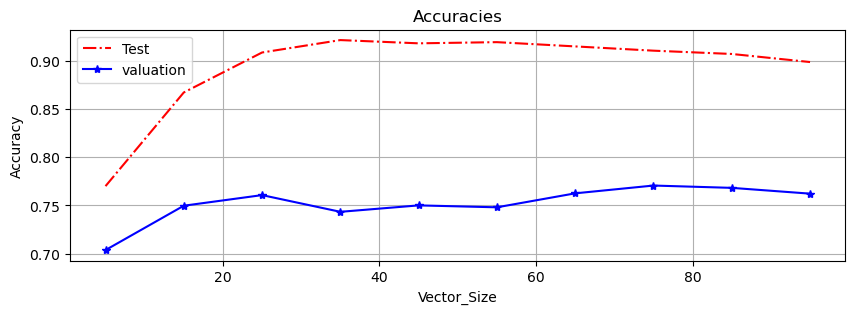

In [14]:
##Plotting accuracies of the various models 
Accuracies.plot(grid=True, figsize=(10,3), xlabel="Vector_Size", ylabel="Accuracy", style=["r-.","b*-"], title="Accuracies")

In [16]:
#Selecting the best model
#The accuracies are too similar. To get the best model, the set of accuracies are normalied. This provides a clearer comparison.
#Post normalising them, a weighed averaged of validation and training accuracy is used to select the best model.
#For this, more weight has been put on the validation accuracy (75%) than in the training one (25%).
# The code automatically retrieves the best model ID id_best_len

Accuracies_val_norm=[(i-min(Accuracies_val))/(max(Accuracies_val)-min(Accuracies_val)) for i in Accuracies_val]

Accuracies_train_norm=[(i-min(Accuracies_train))/(max(Accuracies_train)-min(Accuracies_train)) for i in Accuracies_train]

Average_Normalised=[(Accuracies_val_norm[i])*0.75+(Accuracies_train_norm[i])*0.25 for i in range(0,len(Accuracies_train))]

id_best_len=Average_Normalised.index(max(Average_Normalised))
bestlenvec=pd.DataFrame(Average_Normalised, index=range(5,105,10)).iloc[:, 0].idxmax()
print(f"According to the previous formula, the best model is the one that is vectorising with vectors of len {bestlenvec}")



According to the previous formula, the best model is the one that is vectorising with vectors of len 75


<Axes: title={'center': 'Normalised Accuracies'}, xlabel='Vector_Size', ylabel='Accuracy'>

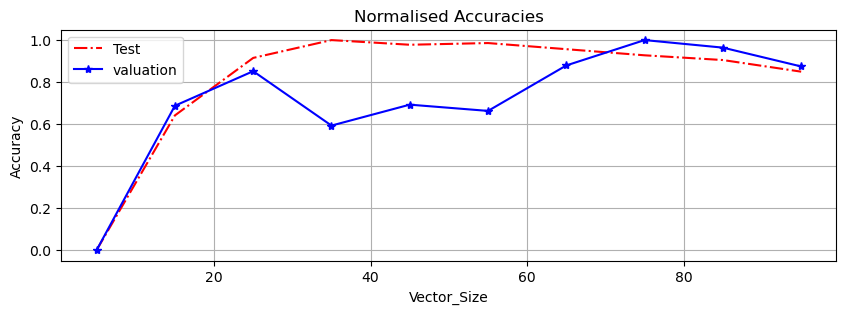

In [17]:
#Plotting normalised accuracies for easier visual inspection 
Accuracies_norm=pd.DataFrame({"Test":Accuracies_train_norm,"valuation":Accuracies_val_norm}, index=range(5,105,10))
Accuracies_norm.plot(grid=True, figsize=(10,3), xlabel="Vector_Size", ylabel="Accuracy", style=["r-.","b*-"], title="Normalised Accuracies")

In [18]:
#Saving the champion
models[id_best_len].save("champion_twitter_sentiment.keras")


$$
\textbf{Evaluation:}
$$


$$
\small{\text{- Testing the Champion Model -}}
$$

In [19]:
#Metrics for champion model
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the predicted labels
y_pred_prob = models[id_best_len].predict(vetortuype[id_best_len](test_data["inputs"]))

# Convert probabilities to binary labels (for binary classification)
# If you have a multi-class classification, use `argmax()` instead.
y_pred = [1 if i >= 0.5 else 0 for i in y_pred_prob]


# Calculate precision, recall, and f1-score
precision = sk.metrics.precision_score(test_data["outputs"], y_pred)
recall = sk.metrics.recall_score(test_data["outputs"], y_pred)
f1 = sk.metrics.f1_score(test_data["outputs"], y_pred)

print(f"Accuracy: {test_accuracies[id_best_len]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.7729436755180359
Precision: 0.7779291553133515
Recall: 0.7081533045287246
F1 Score: 0.7414031413612566


$$
\small{\text{- Defining and testing a function that will tell us if a tweet has a positive sentiment -}}
$$

In [20]:
#Defining a function that will give us if a tweet has positive or negative sentiment and the probability of that
def positive_negative_tweet(tweet): 
    input_x = vetortuype[id_best_len]([tweet])
    Y= (models[id_best_len].predict(input_x))
    if Y>=0.5:
        if Y>0.8:
            return print(f"Positive sentiment with prob of: {float(Y)}")
        else: 
            return print(f"Positive sentiment with a low prob of: {float(Y)}")
    else:
        if Y<0.2:
            return print(f"Negative sentiment with prob of: {1-float(Y)}")
        else:
            return print(f"Negative sentiment with low prob of: {1-float(Y)}")



In [38]:
tweet="@smartinez again Im watching another boring MCU movie"
positive_negative_tweet(tweet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Negative sentiment with low prob of: 0.6993931829929352


In [35]:
tweet="@smartinez gotta admit, they are nice"
positive_negative_tweet(tweet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Positive sentiment with prob of: 0.9581043124198914


In [36]:
tweet="@smartinez Gotta admit they are lame"
positive_negative_tweet(tweet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Negative sentiment with low prob of: 0.6430310308933258


In [42]:
tweet="@smartinez I dont love them"
positive_negative_tweet(tweet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Negative sentiment with low prob of: 0.7754504084587097


In [41]:
tweet="@smartinez I love them"
positive_negative_tweet(tweet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Positive sentiment with prob of: 0.9124240875244141



$$
\textbf{Conclusions and Improvements:}
$$


$
\small\text{The end result is function that defines if a tweet has a positive or negative sentiment and the probability of that.}
$
$
\small\text{Models with accuracy of around 50% are noisy models, with no power.The model has a test accuracy of 76% which means it has some predictive power.}
$
$
\small\text{However someone using the model should be aware that there is 25% of getting the opposite outcome.}
$
$
\small\text{That is why is important to look at the model output in float terms, it gives an indicative of the prob. of that tweet being positive or negative.}
$
$
\small\text{Another point to comment is the accuracy of the dataset. One of the underlying assumption is that the data is correctly split into positive and negative tweet.}
$
$
\small\text{A mistake in this classification would introduce noise in the model.}
$
$
\small\text{Improvement in the model could be achieved by pretrained emmbedders (eg: BERT or from word2vec) that consider a greater set of vocabulary and their relationship.}
$
$
\small\text{Longer set of data would have also been helpful, but that would have slowed the training time.}
$
$
\small\text{Greater GPU and RAM would have allowed me to use GRU layers with sequentiality. However, upon trying those, the computer slowed or crashed.}
$
$
\small\text{But perhaps the greatest flaw is the model is that it considers that tweets can be either positive or negative; when in reality there are tweets that do not have any sentiment at all.}
$

